# Chapter 6: AI Classification 1

## Introduction

In machine learning, **classification** is a machine learning technique used to predict **categorical** values. For example to classify a category labeled 0 or 1 to predict:

- if an email is a spam or not
- if a patient is sick or not ...

This is called binary classification and uses algorithm such as:

- logistic regression
- k-nearest neighbors (KNN)
- decision trees
- support vector machine (SVM)
- naive Bayes

Some of the algorithms above work also with multiclass prediction problems.

Multiclass classification means assigning input sample to one or several classes such as for example:
- OCR assigning handwritten digits to 10 classes
- plant species classification...

Using the following algorithms:
- k-nearest neighbors
- decision trees
- naive Bayes
- random forest
- gradient boosting

## Model evaluation and confusion matrix

In classification problems, a **confusion matrix** is a table used to evaluate the performance of a classification model. For a binary classification, it is typically a 2x2 table. As an example we are trying to solve a binary classification problem with classes 0 and 1. We have the true values, and what the model predicts giving us the following table: 

|	sample #	|	prediction	|	true	|
|-- 	        |-- 	        |   --	    |
|	1	        |	1	        |	0	    |
|	2	        |	1	        |	1	    |
|	3	        |	0	        |	0	    |
|	4	        |	1	        |	1	    |
|	5	        |	0	        |	0	    |
|	6	        |	0	        |	0	    |
|	7	        |	1	        |	0	    |
|	8	        |	1	        |	1	    |
|	9	        |	0	        |	0	    |
|	10	        |	1           |	1	    |

We can summarize the result of the table in a matrix as follow:

|           | predicted 0 | predicted 1 |
| --        | --          | --          | 
|actual 0   | TN = 4      | FP = 2      |
|actual 1   | FN = 0      | TP = 4      |

Where
- True positive **TP** is the number of correctly predicted 1's, Here 4
- True negatives **TN** is the number of correctly predicted 0's, Here 4
- False positive **FP** is the number of incorrectly predicted 1's, Here 2
- False negative **FN** is the number of incorrectly predicted 0's. Here 0.

There are 10 total number of predictions.

From the confusion matrix, we can derive several performance metrics:

$$ Accuracy = \frac{TP + TN}{TP + FP + TN + FN} = 0.8$$
$$ Precision = \frac{TP}{TP + FP} = \frac{2}{3} $$
$$ Recall (Sensitivity): \frac{TP}{TP + FN} = 1 $$
$$ Specificity: \frac{TN}{TN + FP} = \frac{2}{3} $$

In multiclass classification precision and recall are calculated for each class by dividing the diagonal value with row and column sums, respectively

## Logistic regression, basic idea

Logistic regression borrows ideas from linear regression but we predict categorical variable having only two possible values 0 and 1.

Instead of fitting a straight line as in linear regression, we fit a curved line called sigmoid function (or logistic function) that produce output values between 0 and 1.
$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

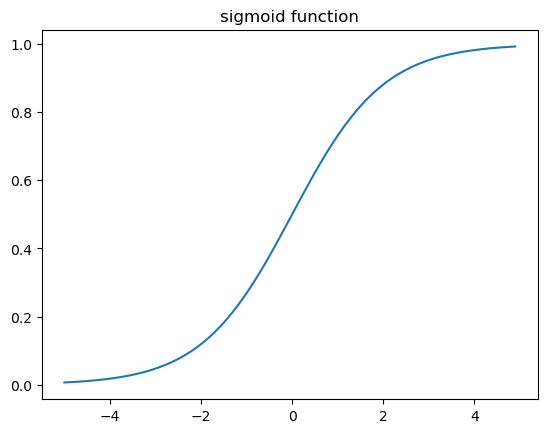

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5 , 0.1)
y = 1 / ( 1 + np.exp(-x))

plt.plot(x,y)
plt.title("sigmoid function")
plt.show()

## Logistic regression with sklearn

The use of logistic regression is very similar to linear regression. Let's illustrate this by predicting college admission of students.

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
path = os.path.join(os.getcwd(), "data/exams.csv")
df = pd.read_csv(path)
df.head()

,exam1,exam2,admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Let's have a look at how exam scores predict admissions

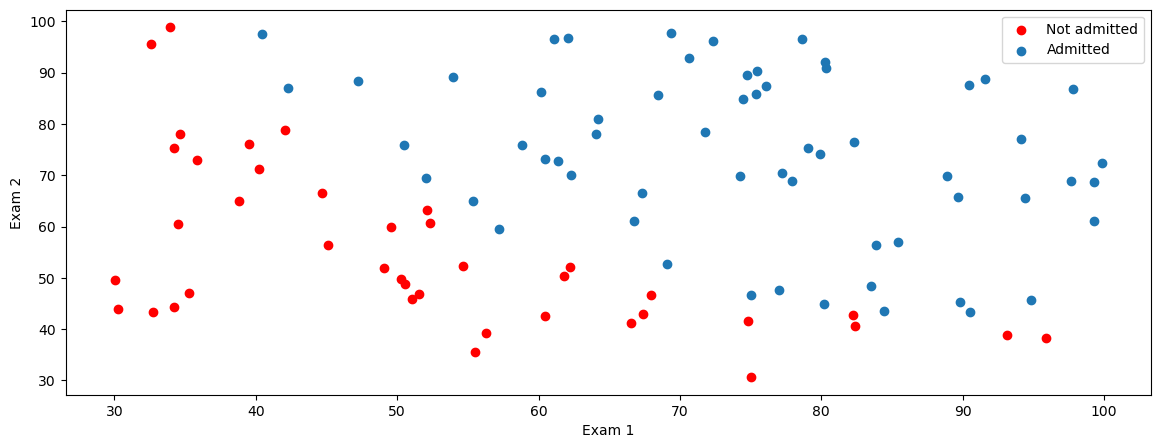

In [4]:
admit_yes = df.loc[df.admit == 1]
admit_no = df.loc[df.admit == 0]

plt.figure(figsize=(14,5))
plt.scatter(admit_no.iloc[:,0],admit_no.iloc[:,1], label = "Not admitted" , c = 'r')
plt.scatter(admit_yes.iloc[:,0], admit_yes.iloc[:,1], label = "Admitted")
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend()
plt.show()

The scatter plot shows clearly how students should perform to get admitted to the university.

Let's prepare the data and train the **logistic regression** model

[[11  0]
 [ 4 10]]


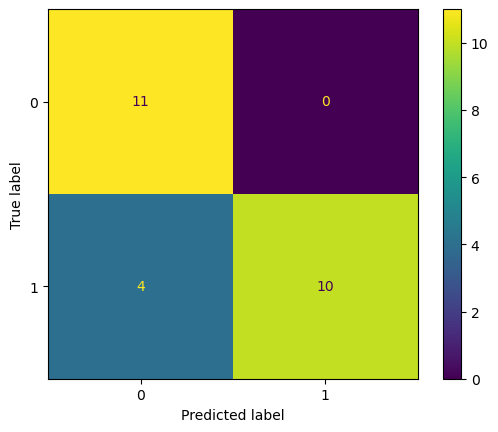

In [5]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()


Let's compute some metrics and plot the prediction labels.

In [6]:
print("Accuracy:  {}".format( metrics.accuracy_score(y_test, y_pred)))
print("Precision: {}".format(metrics.precision_score(y_test, y_pred)))
print("Recall:    {:.4f}".format( metrics.recall_score(y_test, y_pred)))

Accuracy:  0.84
Precision: 1.0
Recall:    0.7143


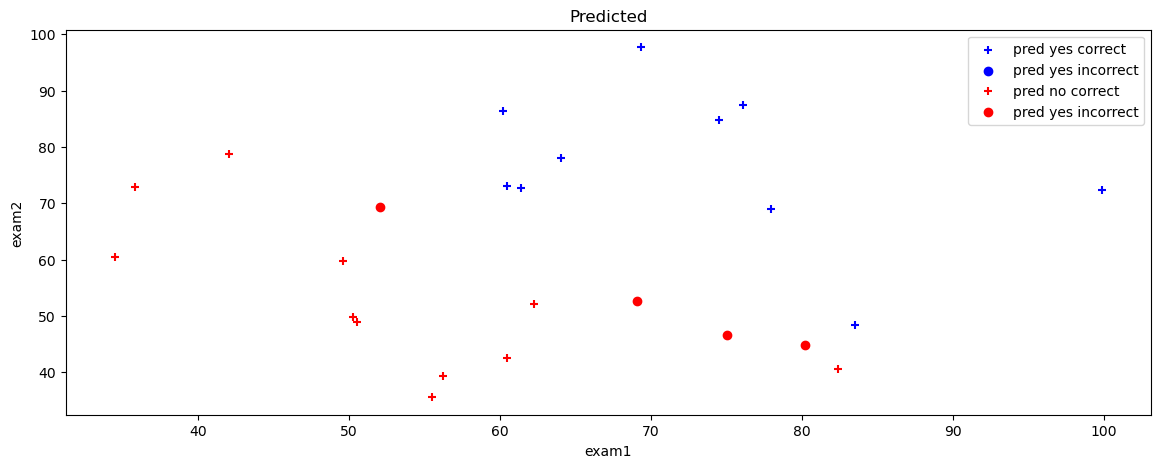

In [7]:
idx1 = np.logical_and(y_pred == 1, y_test == 1)
idx2 = np.logical_and(y_pred == 1, y_test == 0)
idx3 = np.logical_and(y_pred == 0, y_test == 0)
idx4 = np.logical_and(y_pred == 0, y_test == 1)
X1 = X_test.loc[idx1]
X2 = X_test.loc[idx2]
X3 = X_test.loc[idx3]
X4 = X_test.loc[idx4]

plt.figure(figsize=(14,5))
plt.scatter(X1.iloc[:,0],X1.iloc[:,1],label="pred yes correct",marker="+",color="blue")
plt.scatter(X2.iloc[:,0],X2.iloc[:,1],label="pred yes incorrect",marker="o",color="blue")
plt.scatter(X3.iloc[:,0],X3.iloc[:,1],label="pred no correct",marker="+",color="red")
plt.scatter(X4.iloc[:,0],X4.iloc[:,1],label="pred yes incorrect",marker="o",color="red")

plt.xlabel("exam1")
plt.ylabel("exam2")
plt.legend()
plt.title("Predicted")
plt.show()

## k-nearest neighbors KNN

The basic idea in k-nearest algorithm is to compute distances to all data points and look for the nearest neighbors and their class. It is **non-parametric** ie. it does not make any assumptions on the underlying data. Several possibilities can be used to calculate the distance, the most common one are [Euclidian distance](https://en.wikipedia.org/wiki/Euclidean_distance) and [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry).

The algorithm finds **k** nearest neighbors, checks their class and assigns the class which **majority of neighbors** belong to.

Below is a simple implementation of KNN using Euclidean distance and with two-dimension case.

In [8]:
import numpy as np

class KNN:
    k=1
    x_train = 0
    y_train = 0
    
    def __init__(self, kval):
        self.k = kval
    
    def fit(self, xt, yt):
        self.x_train = xt
        self.y_train = yt

    def predict(self, xpt, ypt):
        x = np.array(self.x_train.iloc[:,0])
        y = np.array(self.x_train.iloc[:,1])
        label = np.array(self.y_train)

        d = np.sqrt( (x-xpt)**2 + (y-ypt)**2 )
        d2 = d.argsort()

        idx2 = d2[0:self.k]

        n0 = np.sum(label[idx2] == 0)
        n1 = np.sum(label[idx2] == 1)

        if n0 > n1:
            return 0
        else:
            return 1

Let's demonstrate the usage with the exams data set.

In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

path = os.path.join( os.getcwd(), "data/exams.csv")

df = pd.read_csv(path)

X = df.iloc[:,0:2]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

knn = KNN(3)
knn.fit(X_train, y_train)

ypred = knn.predict(50,60)
ypred2 = knn.predict(90,80)
print("Prediction with exam scores 50 and 60: {}".format(ypred))
print("Prediction with exam scores 90 and 80: {}".format(ypred2))


Prediction with exam scores 50 and 60: 0
Prediction with exam scores 90 and 80: 1


### k-nearest neighbors with sklearn

K-nearest neighbors algorithm is available in sklearn as `KNeighborsClassifier()`.

Lets use it with an example.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

We are going to classify the iris flowers from the infamous `iris.csv` dataset.

In [11]:
path = os.path.join(os.getcwd(), "data/iris.csv")
df = pd.read_csv(path)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Prepare the data and train the model.

In [12]:
X = df.iloc[:,0:4].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Let's evaluate the model predictions with a confusion matrix.

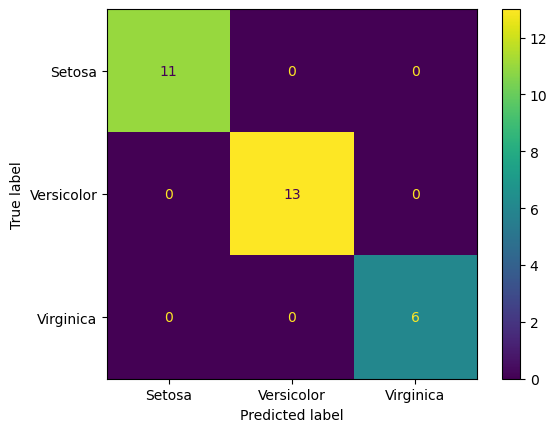

In [13]:
metrics.ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.show()

We can also ask sklearn to give us a classification report.

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We have a 100% accuracy in our example. We picked $k=5$ randomly in this example. Let's try  different values of $k$ and record the mean error rate.

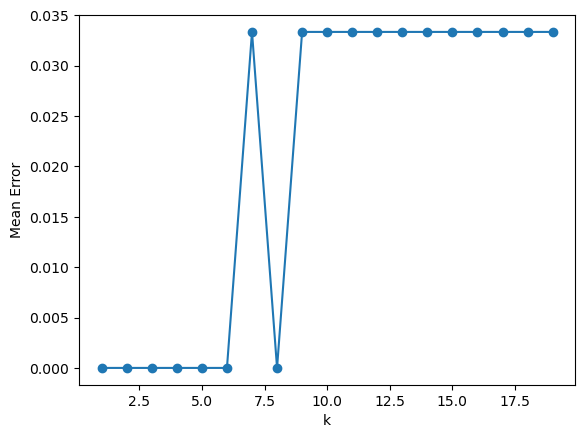

In [15]:
error = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))

plt.plot(range(1,20), error, marker = 'o')
plt.xlabel('k')
plt.ylabel('Mean Error')
plt.show()

We can see that for $k=7$ and as $k>8$ error rate is not 0 anymore.

In [16]:
def euc(x,y, xpt,ypt):
     return np.sqrt( (x-xpt)**2 + (y-ypt)**2 )

def man(x,y,xpt,ypt):
     return np.abs(x-xpt) + np.abs(y-ypt)

print("Euclidean distance between (1,2) and (4,6): {} ".format(euc(1,2,4,6)))
print("Manhattan distance between (1,2) and (4,6): {} ".format(man(1,2,4,6)))


Euclidean distance between (1,2) and (4,6): 5.0 
Manhattan distance between (1,2) and (4,6): 7 
